# 3

In [27]:
norm = stats.norm(loc=70, scale=10)

In [28]:
s_x = np.linspace(-10, 150, 200)

s_pdf = norm.pdf(s_x)

In [ ]:
# mu = 70
# sigma=10
# s_pdf_cal = (1 / np.sqrt(2*np.pi*sigma**2))*np.exp(-(s_x-mu)**2 / (2*sigma**2))

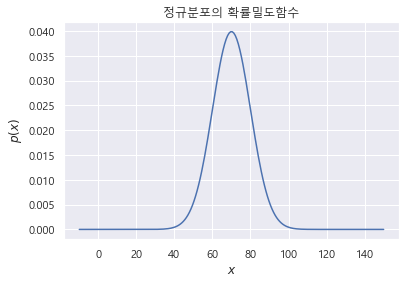

In [29]:
plt.plot(s_x, s_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

In [31]:
s_cdf = norm.cdf(s_x)

# from scipy.special import erf
# s_cdf_cal = 0.5 * (1 + erf((s_x-mu)/np.sqrt(2*sigma**2)))

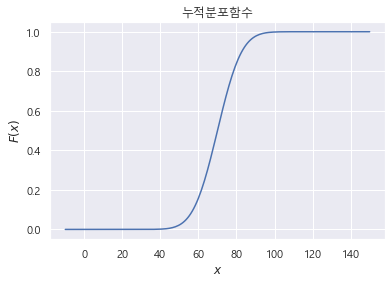

In [32]:
plt.plot(s_x, s_cdf)
plt.title('누적분포함수')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.show()

In [33]:
stan_norm = stats.norm(loc=0, scale=1)

sn_x = np.linspace(-5, 5, 1000)

sn_pdf = stan_norm.pdf(sn_x)

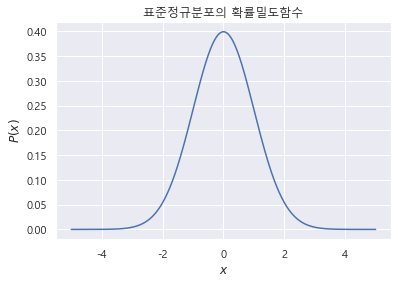

In [34]:
plt.plot(sn_x, sn_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

In [39]:
n_data = np.random.randint(1, 100, size=1000)
n_data = np.sort(n_data)
n_data.shape

(1000,)

In [41]:
n_mean = np.mean(n_data)
print('mean : ', n_mean)
print('mean : ', np.mean(n_data))

n_std = np.std(n_data)
print('standrd deviation : ', n_std)
print('standard deviation : ', np.std(n_data))

mean :  50.906
mean :  50.906
standrd deviation :  29.29841572508657
standard deviation :  29.29841572508657


In [42]:
norm_n_data = stats.norm(loc = n_mean, scale = n_std)
n_pdf = norm_n_data.pdf(n_data)
n_data.shape

(1000,)

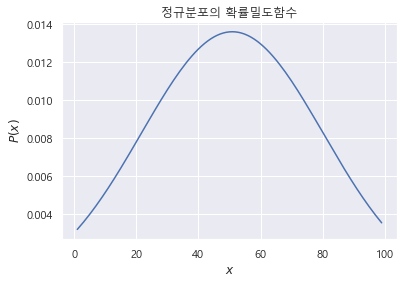

In [43]:
plt.plot(n_data, n_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

In [44]:
z_data = list(n_data)
z_data_list = []

for i in z_data:
    z = (i - n_mean) / n_std
    z_data_list.append(z)

In [45]:
norm_z_data = stats.norm(loc=0, scale=1)
z_pdf = norm_z_data.pdf(z_data_list)

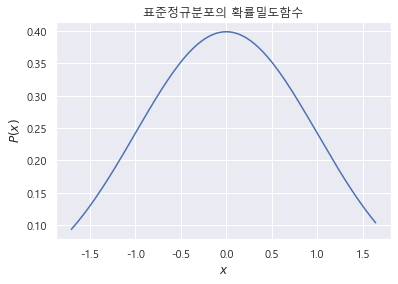

In [46]:
plt.plot(z_data_list, z_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

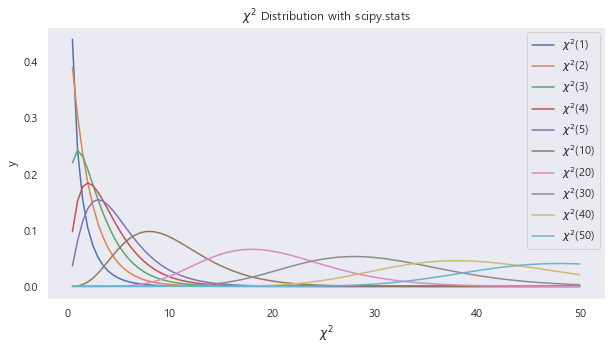

In [47]:
from scipy.stats import chi2

Chi_X = np.linspace(0.5, 50, 100)

plt.figure(figsize=(10,5))
for dof in [1,2,3,4,5,10,20,30,40,50]:
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
            label=r'$\chi^2$(' + str(dof) + ')')
    
plt.xlabel(r'$\chi^2$')
plt.ylabel('y')
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [48]:
x_o = [324, 78, 261]
x_e = [371, 80, 212]

x_crosstab = pd.DataFrame([x_o, x_e],
                         columns=['서울', '인천', '대구'],
                         index=['관찰도수', '기대도수'])

In [49]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [50]:
from scipy.stats import chisquare

result = chisquare(x_o, f_exp=x_e)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

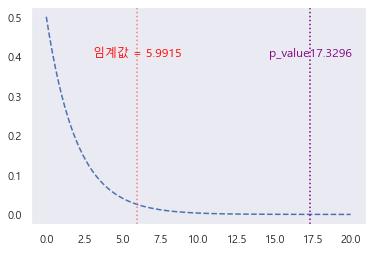

In [51]:
from scipy.stats import chi2

dof=2
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c,4)),
        horizontalalignment='center', color='red')

plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, 'p_value' + str(round(result[0], 4)),
        horizontalalignment='center', color='purple')
plt.grid()
plt.show()